<a href="https://colab.research.google.com/github/saharshhhh/DeepLearning/blob/main/CIFAR10_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

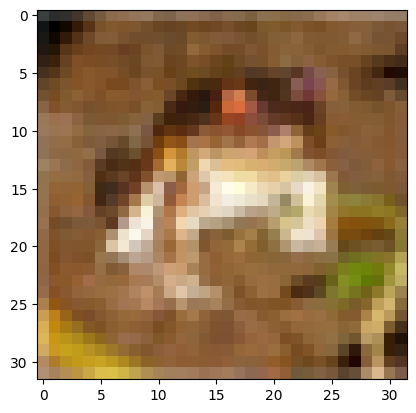

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(X_train[0])

In [3]:
X_train=X_train/255
X_test=X_test/255


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [7]:
img_rows,img_cols=32,32
input_shape=(img_rows,img_cols,3)

In [8]:
model=keras.Sequential()

In [9]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential


In [10]:
model = Sequential()
model.add(Conv2D(180, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, kernel_size=(3, 3), activation='relu',  input_shape=input_shape,padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(240, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 80)     │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 80)     │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 100)    │        72,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 100)    │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 120)      │       108,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 120)      │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 240)            │       115,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        15,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,174 (1.20 MB)

 Trainable params: 314,574 (1.20 MB)

 Non-trainable params: 600 (2.34 KB)

In [11]:
hist = model.fit(X_train, y_train, batch_size=500, epochs=35, verbose=1, validation_split=0.1)

Epoch 1/35
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.3082 - loss: 1.9975 - val_accuracy: 0.0950 - val_loss: 2.7874
Epoch 2/35
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5476 - loss: 1.2708 - val_accuracy: 0.0954 - val_loss: 3.1254
Epoch 3/35
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.6356 - loss: 1.0446 - val_accuracy: 0.1880 - val_loss: 2.5821
Epoch 4/35
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6803 - loss: 0.9153 - val_accuracy: 0.2886 - val_loss: 2.2715
Epoch 5/35
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7229 - loss: 0.8006 - val_accuracy: 0.3612 - val_loss: 1.8942
Epoch 6/35
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7598 - loss: 0.6980 - val_accuracy: 0.6466 - val_loss: 1.0028
Epoch 7/35
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7849 - loss: 0.6205 - val_accuracy: 0.6932 - val_loss: 0.9042
Epoch 8/35
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8134 - loss: 0.5368 - val_accuracy: 0.6990 - 

In [12]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7493 - loss: 1.5559


[1.5964322090148926, 0.7437000274658203]

In [13]:
model.evaluate(X_train, y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9755 - loss: 0.0759


[0.21208705008029938, 0.9538000226020813]

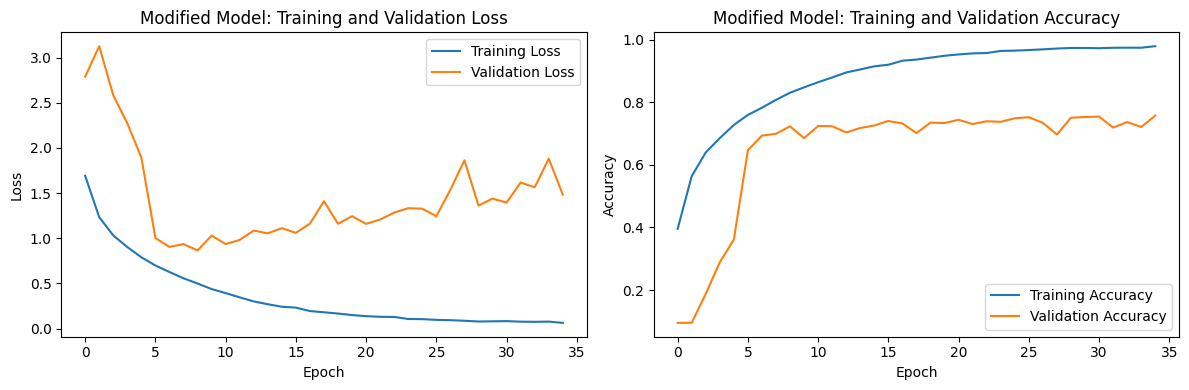

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Modified Model: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modified Model: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
y_hat=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [15]:
cifar_labels=['airplane','automobile','bird','cat','deer','dog','frog','ship','horse','duck']

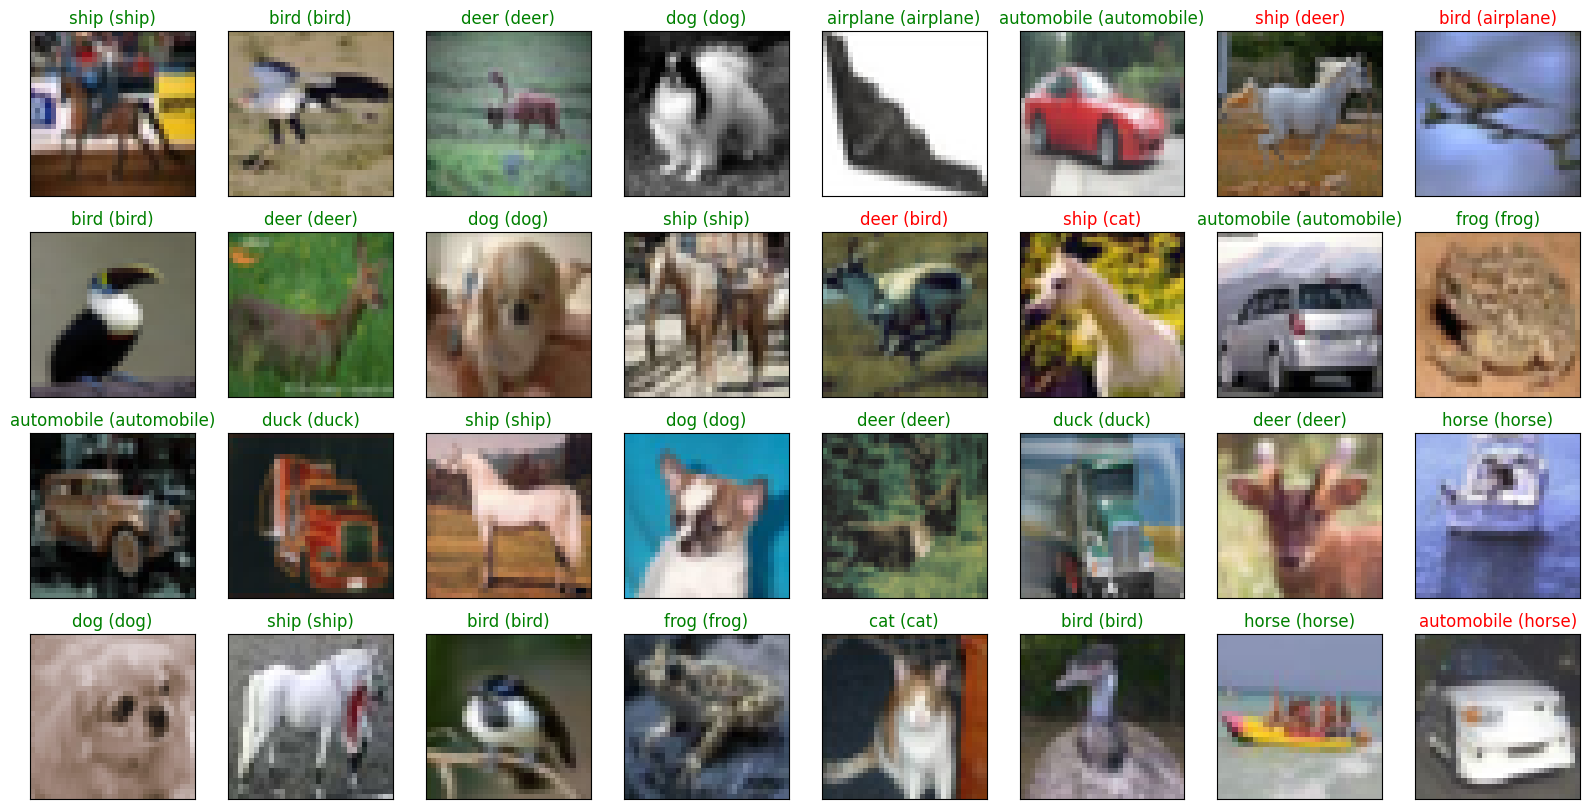

In [22]:
fig=plt.figure(figsize=(20,10))
for i,idx in enumerate(np.random.choice(X_test.shape[0],size=32,replace=False)):
  ax=fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
  ax.imshow(X_test[idx])
  prd_idx=np.argmax(y_test[idx])
  true_idx=np.argmax(y_hat[idx])
  ax.set_title("{} ({})".format(cifar_labels[prd_idx],cifar_labels[true_idx]),color=("green" if prd_idx==true_idx else "red"))

In [ ]:
!pip install opencv-python

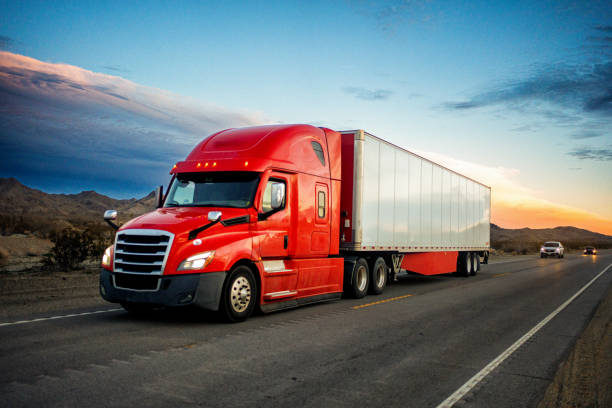

In [27]:
import cv2
from google.colab.patches import cv2_imshow
truck=cv2.imread('/content/truck.jpg')
cv2_imshow(truck)

In [29]:
truck.shape

(408, 612, 3)

In [30]:
truck_norm=truck/255

In [32]:
resize_truck=cv2.resize(truck_norm,(32,32))
resize_truck.shape

(32, 32, 3)

In [33]:
prediction=model.predict(resize_truck.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


In [40]:
np.argmax(prediction)

np.int64(9)